In [76]:
import pandas as pd
import numpy as np

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
train = pd.read_csv("titanic_train.csv")

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
train.isnull() # True => isnull

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


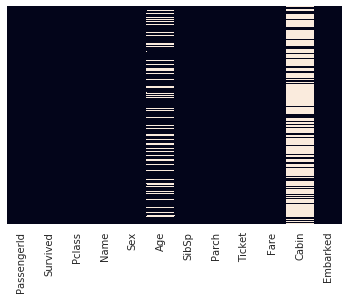

In [84]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False) 
# yticklabels = False => Does not show label for y
# cbar = False => Does not show color bar

As we can see, there's many white value on Cabin column that represent NaN value and about 20% of white value on Age column

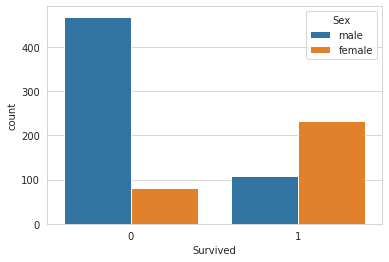

In [85]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data=train)

Most people who did not survive are male.

Most people who survived are female.

Most males did not survive.

Most female are survived.

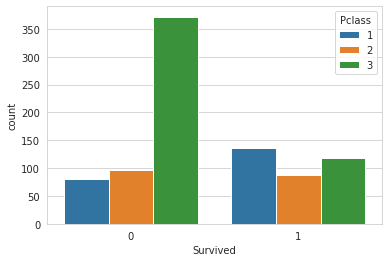

In [86]:
sns.countplot(x="Survived", hue="Pclass", data=train)

Most people who did not survive are class 3

Most people who survive are class 1

About 60% of class 1 survived

About 45% of class 2 survived

Only 20% of class 3 survived

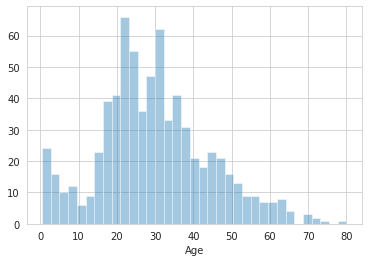

In [87]:
sns.distplot(train["Age"].dropna(), kde=False, bins=35)
# kde = False : Does not show 
# bins = 20 : seperate data into 30 columns

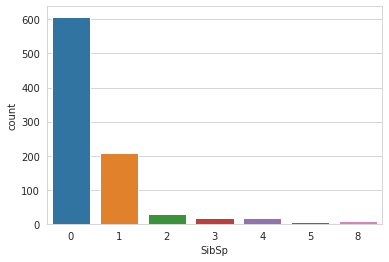

In [88]:
sns.countplot("SibSp", data=train)

Most passengers on the ship does not have any Sibling.



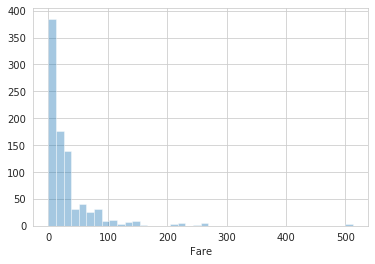

In [89]:
sns.distplot(train["Fare"], kde=False, bins=40)

Most people who get on Titanic is class 3 and 2 with ticket price below 50$

In [90]:
import cufflinks as cf

In [91]:
cf.go_offline()

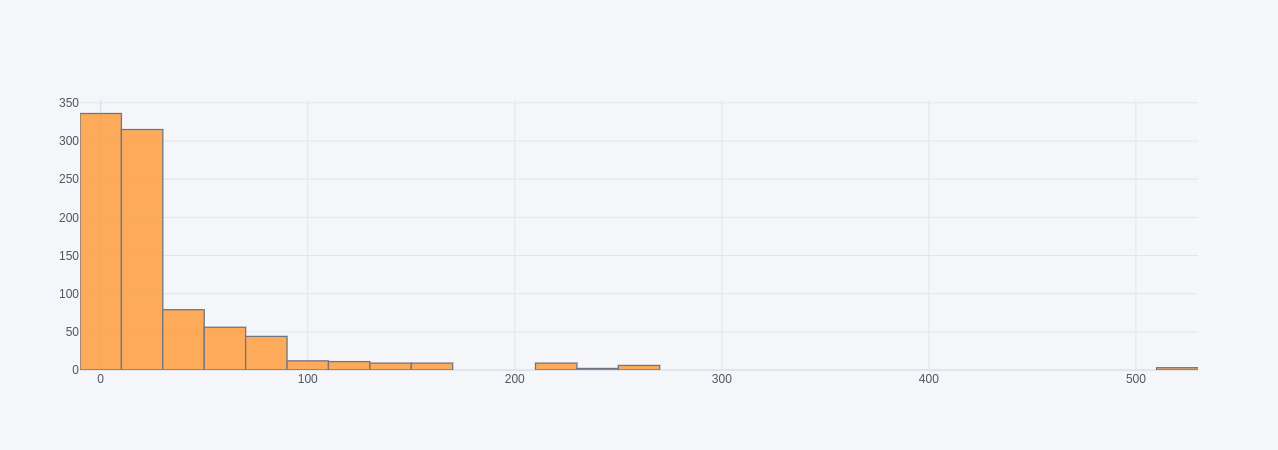

In [92]:
train["Fare"].iplot(kind="hist", bins=30)

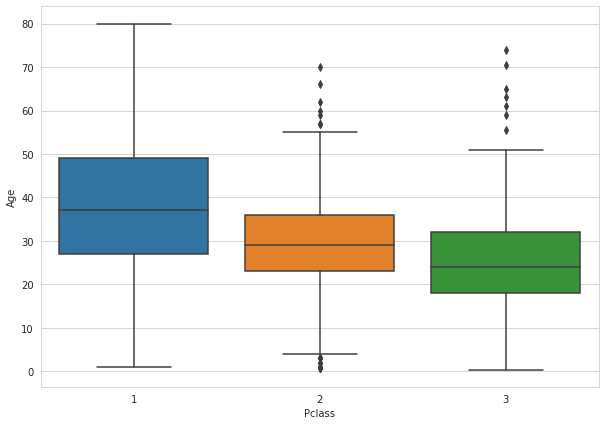

In [93]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Pclass", y="Age", data=train)

As we can see, the passenger in 1st class are older than the passenger in 2 other class

1st class : Age from 27 to 49

2nd class : Age from 23 to 36

3rd class : Age from 18 to 32

With these insights, we can replace all the NaN in Age field with resonable data

In [94]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return np.random.randint(27, 49)
        elif Pclass == 2:
            return np.random.randint(23, 36)
        else:
            return np.random.randint(18, 32)
    else:
        return Age

In [95]:
# Finish training
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

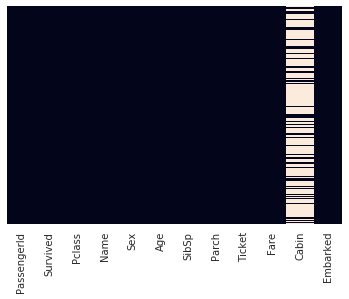

In [96]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

Because the Cabin columns missing a lots and we can't reasonably compute it, so it's better to drop it

In [97]:
train.drop("Cabin", axis=1, inplace=True)

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


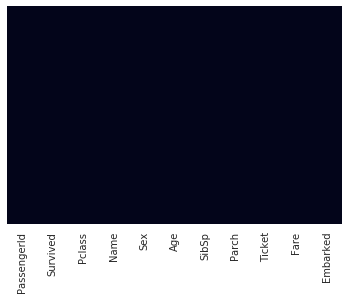

In [99]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [100]:
train[train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [101]:
train.dropna(inplace=True)

# Create numerical data for "Sex" and "Embarked" Columns

In [102]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [103]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [104]:
train = pd.concat([train, sex, embark], axis=1)


In [105]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


# Drop unnescessary string information

In [106]:
train.drop(["PassengerId", "Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [107]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [117]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [110]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logmodel = LogisticRegression()

In [122]:
logmodel.fit(X_train, y_train)

/home/ngoclam9415/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
predictions = logmodel.predict(X_test)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.83      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [127]:
from sklearn.metrics import confusion_matrix

In [129]:
confusion_matrix(y_test, predictions) # [[True positive, False negative], 
                                      #  [False negative, True positive]]

array([[148,  15],
       [ 31,  73]])

0 : positive

1 : negative
